## A look at the data

Using the course content from Udacity as reference, here I will get familiar with the data for this project.

First, read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

df = pd.read_csv('survey-results-public.csv')
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


### Question 1: Provide the number of rows and columns.

In [2]:
df.shape

(51392, 154)

### Question 2: Provide a list of column names that have no missing values.

In [3]:
# We can use boolean mask from notnull to filter the column names:
no_nulls = list(df.columns[df.notnull().all()])
', '.join(no_nulls)

'Respondent, Professional, ProgramHobby, Country, University, EmploymentStatus, FormalEducation'

In [4]:
# or we can use isnull:
no_nulls = list(df.columns[df.isnull().mean() == 0])
', '.join(no_nulls)

'Respondent, Professional, ProgramHobby, Country, University, EmploymentStatus, FormalEducation'

### Question 3: Which columns have more than 75% values missing?

In [5]:
missing_75 = list(df.columns[df.isnull().mean() > 0.75])
', '.join(missing_75)

'YearsCodedJobPast, WebDeveloperType, MobileDeveloperType, NonDeveloperType, ExCoderReturn, ExCoderNotForMe, ExCoderBalance, ExCoder10Years, ExCoderBelonged, ExCoderSkills, ExCoderWillNotCode, ExCoderActive, TimeAfterBootcamp, ExpectedSalary'

### Question 4: Show the value counts of Professional status.

In [6]:
status_count = df.Professional.value_counts()
status_count

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

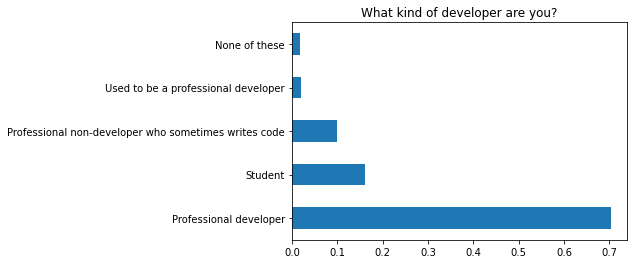

In [7]:
# We can use plt to make a bar or pie chart
(status_count / df.shape[0]).plot(kind = 'barh', title = 'What kind of developer are you?');

# We can also add title in a separate line, if not as an arg of plot()
#plt.title('What kind of developer are you?');

### Question 5: Show the distribution of FormalEducation

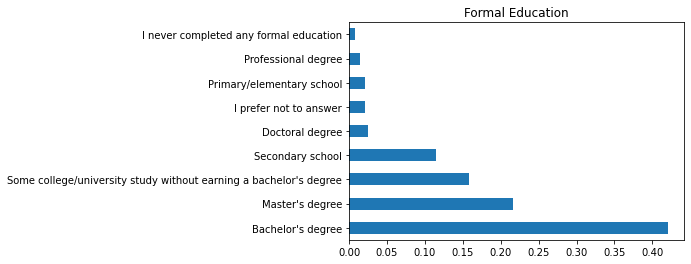

In [8]:
ed_vals = df.FormalEducation.value_counts()
(ed_vals / df.shape[0]).plot(kind = 'barh', title = 'Formal Education');

### Question 6: Show the distribution of Country

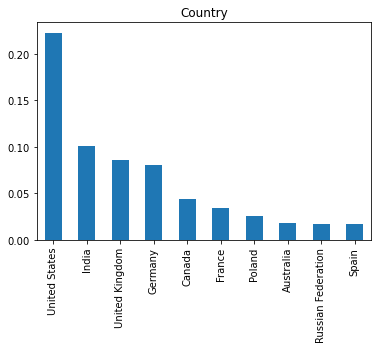

In [9]:
country_vals = df.Country.value_counts()
(country_vals[:10] / df.shape[0]).plot(kind = 'bar', title = 'Country');

### Question 7: Show the distribution of different columns to see if anything interesting

#### First let's explore the column FriendsDevelopers

In [9]:
# check how much percent of FriendsDevelopers column is null
df.FriendsDevelopers.isnull().mean()

0.3956841531755915

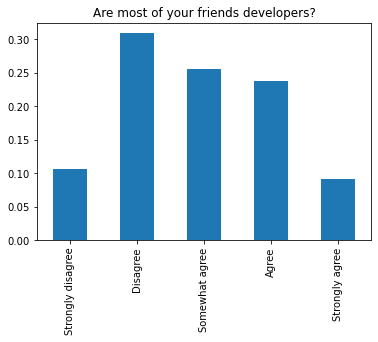

In [47]:
FriDev = df.FriendsDevelopers.value_counts()
new_index = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
FriDev = FriDev.reindex(index = new_index)
(FriDev / np.sum(FriDev)).plot(kind = 'bar', title = 'Are most of your friends developers?');

The data shown above has an expected normal distribution pattern. We can ask the question: <br>
**Does the composition of your friend circle related to job satisfaction?**

#### Then let's explore the column SeriousWork

In [26]:
df.SeriousWork.isnull().mean()

0.3965208592777086

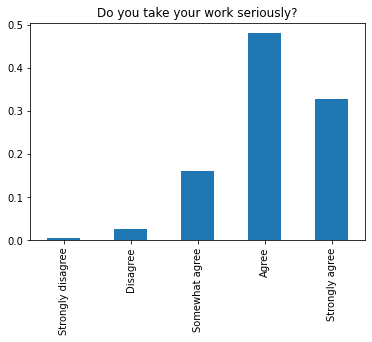

In [25]:
SerWork = df.SeriousWork.value_counts()
new_index = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
SerWork = SerWork.reindex(index = new_index)
(SerWork / np.sum(SerWork)).plot(kind = 'bar', title = 'Do you take your work seriously?');

It doesn't surprise me that most of the respondents take their work at least somewhat seriously. Because we essentially only have 3 categories, I wonder if it's less interesting to find this column's correlation with job satisfaction. But I'll do it anyways.

#### How about CompetePeers?

In [27]:
df.CompetePeers.isnull().mean()

0.40049034869240346

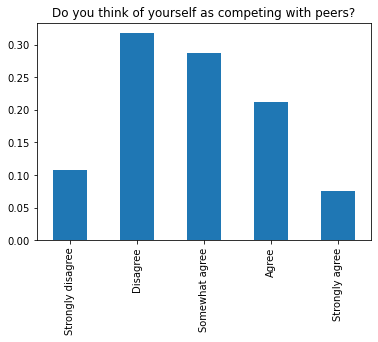

In [28]:
peers = df.CompetePeers.value_counts()
new_index = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
peers = peers.reindex(index = new_index)
(peers / np.sum(peers)).plot(kind = 'bar', title = 'Do you think of yourself as competing with peers?');

This is one is a nice normal distribution, so we will definitely try to analyze its correlation with job satisfaction.

#### How about DifficultCommunication?

In [30]:
df.DifficultCommunication.isnull().mean()

0.4232565379825654

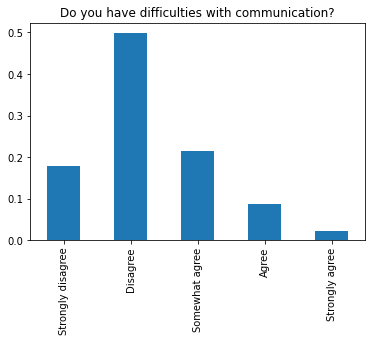

In [31]:
DiffComm = df.DifficultCommunication.value_counts()
new_index = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
DiffComm = DiffComm.reindex(index = new_index)
(DiffComm / np.sum(DiffComm)).plot(kind = 'bar', title = 'Do you have difficulties with communication?');

In [32]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


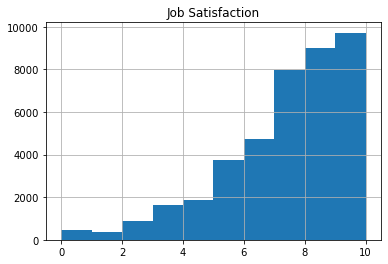

In [44]:
%matplotlib inline
df.JobSatisfaction.hist(bins = 10)
plt.title('Job Satisfaction');


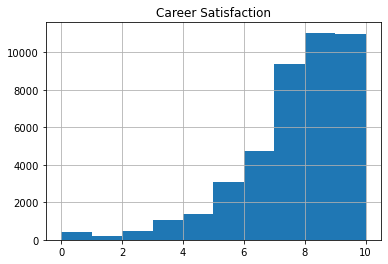

In [45]:
df.CareerSatisfaction.hist(bins = 10)
plt.title('Career Satisfaction');